In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import yfinance as yf

In [35]:
S= "XOM"
stk = yf.Ticker(S)
df= stk.history(period="10y")
df.iloc[:,0:5].to_csv("modeldata//"+S+".csv")

In [36]:
df= pd.read_csv("modeldata//"+S+".csv",index_col="Date",parse_dates=True)
df=df[1:len(df)]
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-11-08,48.684147,49.335698,48.663131,49.265640,23628000
2010-11-09,49.554674,50.132776,49.420722,49.794373,33938100
2010-11-10,50.027024,50.168028,49.455973,50.146873,25482400
2010-11-11,50.055223,50.689727,49.864875,50.640377,23788900
2010-11-12,50.323138,50.337241,49.653387,50.048187,24598100


In [37]:
df.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-11-08 to 2020-11-04
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2516 non-null   float64
 1   High    2516 non-null   float64
 2   Low     2516 non-null   float64
 3   Close   2516 non-null   float64
 4   Volume  2516 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 117.9 KB


<AxesSubplot:xlabel='Date'>

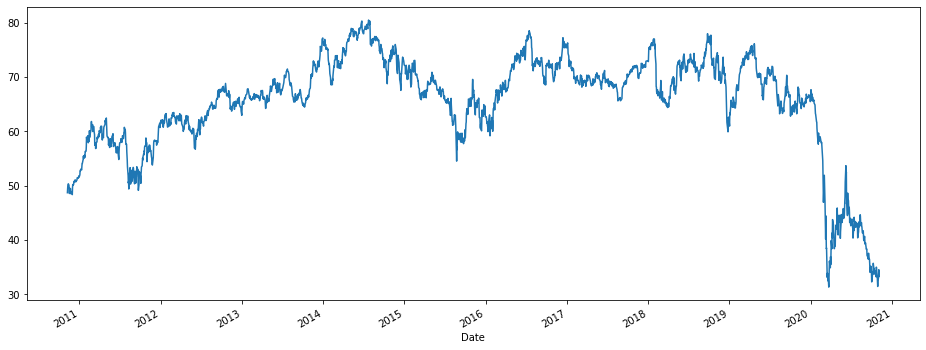

In [39]:
df['Open'].plot(figsize=(16,6))

In [40]:
df= df[['Open']]
training_df= df[:int(len(df)*(4/5))]
testing_df= df[int(len(df)*(4/5)):]

In [41]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_df = sc.fit_transform(training_df)
testing_df= sc.transform(testing_df)

# Training

In [42]:
X_train = []
y_train = []
for i in range(60, len(training_df)):
    X_train.append(training_df[i-60:i])
    y_train.append(training_df[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [43]:
X_train.shape

(1952, 60, 1)

In [44]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [45]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [46]:
# Initialising the RNN
regressor = Sequential()

In [47]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))


In [48]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1952/1952 [==============================] - 7s 4ms/step - loss: 0.0318
Epoch 2/100
1952/1952 [==============================] - 6s 3ms/step - loss: 0.0089
Epoch 3/100
1952/1952 [==============================] - 6s 3ms/step - loss: 0.0085
Epoch 4/100
1952/1952 [==============================] - 6s 3ms/step - loss: 0.0082
Epoch 5/100
1952/1952 [==============================] - 7s 4ms/step - loss: 0.0077
Epoch 6/100
1952/1952 [==============================] - 7s 4ms/step - loss: 0.0076
Epoch 7/100
1952/1952 [==============================] - 7s 4ms/step - loss: 0.0062
Epoch 8/100
1952/1952 [==============================] - 7s 4ms/step - loss: 0.0064
Epoch 9/100
1952/1952 [==============================] - 7s 4ms/step - loss: 0.0059
Epoch 10/100
1952/1952 [==============================] - 7s 4ms/step - loss: 0.0062
Epoch 11/100
1952/1952 [==============================] - 7s 4ms/step - loss: 0.0054
Epoch 12/100
1952/1952 [==============================] - 7s 4ms/step - lo

# Testing

In [49]:
X_test = []
y_test = []
for i in range(60, len(testing_df)):
    X_test.append(testing_df[i-60:i])
    y_test.append(testing_df[i,0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [50]:
X_test

array([[[ 0.79567342],
        [ 0.77449968],
        [ 0.78759397],
        ...,
        [ 0.51700665],
        [ 0.53164101],
        [ 0.60565524]],

       [[ 0.77449968],
        [ 0.78759397],
        [ 0.81322515],
        ...,
        [ 0.53164101],
        [ 0.60565524],
        [ 0.62929449]],

       [[ 0.78759397],
        [ 0.81322515],
        [ 0.75593458],
        ...,
        [ 0.60565524],
        [ 0.62929449],
        [ 0.61297218]],

       ...,

       [[-0.18452757],
        [-0.16135242],
        [-0.11530738],
        ...,
        [-0.5046092 ],
        [-0.52606472],
        [-0.4949697 ]],

       [[-0.16135242],
        [-0.11530738],
        [-0.12027476],
        ...,
        [-0.52606472],
        [-0.4949697 ],
        [-0.47227036]],

       [[-0.11530738],
        [-0.12027476],
        [-0.15012595],
        ...,
        [-0.4949697 ],
        [-0.47227036],
        [-0.43029201]]])

In [51]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [52]:
X_test

array([[[ 0.79567342],
        [ 0.77449968],
        [ 0.78759397],
        ...,
        [ 0.51700665],
        [ 0.53164101],
        [ 0.60565524]],

       [[ 0.77449968],
        [ 0.78759397],
        [ 0.81322515],
        ...,
        [ 0.53164101],
        [ 0.60565524],
        [ 0.62929449]],

       [[ 0.78759397],
        [ 0.81322515],
        [ 0.75593458],
        ...,
        [ 0.60565524],
        [ 0.62929449],
        [ 0.61297218]],

       ...,

       [[-0.18452757],
        [-0.16135242],
        [-0.11530738],
        ...,
        [-0.5046092 ],
        [-0.52606472],
        [-0.4949697 ]],

       [[-0.16135242],
        [-0.11530738],
        [-0.12027476],
        ...,
        [-0.52606472],
        [-0.4949697 ],
        [-0.47227036]],

       [[-0.11530738],
        [-0.12027476],
        [-0.15012595],
        ...,
        [-0.4949697 ],
        [-0.47227036],
        [-0.43029201]]])

In [53]:
predicted_stock_price = regressor.predict(X_test)

In [54]:
predicted_stock_price

array([[ 0.58736205],
       [ 0.62206423],
       [ 0.61800194],
       [ 0.6223159 ],
       [ 0.613155  ],
       [ 0.6029685 ],
       [ 0.6038235 ],
       [ 0.6302652 ],
       [ 0.64830816],
       [ 0.6655824 ],
       [ 0.6840005 ],
       [ 0.7019435 ],
       [ 0.72231615],
       [ 0.7262157 ],
       [ 0.737089  ],
       [ 0.73508596],
       [ 0.7393953 ],
       [ 0.74555075],
       [ 0.7592126 ],
       [ 0.76121867],
       [ 0.779201  ],
       [ 0.7819544 ],
       [ 0.7543533 ],
       [ 0.76221144],
       [ 0.75257325],
       [ 0.7724831 ],
       [ 0.7810796 ],
       [ 0.7920405 ],
       [ 0.79931754],
       [ 0.78774476],
       [ 0.7903273 ],
       [ 0.8171156 ],
       [ 0.80637187],
       [ 0.802715  ],
       [ 0.8124111 ],
       [ 0.7887237 ],
       [ 0.78885347],
       [ 0.80478394],
       [ 0.7880286 ],
       [ 0.81054723],
       [ 0.81549406],
       [ 0.826341  ],
       [ 0.8298078 ],
       [ 0.8163943 ],
       [ 0.8356713 ],
       [ 0

In [55]:
y_test= np.reshape(y_test, (y_test.shape[0], 1))
y_test.shape

(444, 1)

In [56]:
y_test

array([[ 0.62929449],
       [ 0.61297218],
       [ 0.62422902],
       [ 0.60649903],
       [ 0.59605568],
       [ 0.59946999],
       [ 0.63361561],
       [ 0.64784299],
       [ 0.66719206],
       [ 0.68654142],
       [ 0.70418304],
       [ 0.72523984],
       [ 0.72267903],
       [ 0.73690607],
       [ 0.72893866],
       [ 0.73605227],
       [ 0.74174313],
       [ 0.75796224],
       [ 0.75597039],
       [ 0.78044145],
       [ 0.77702714],
       [ 0.74088936],
       [ 0.76080803],
       [ 0.74202782],
       [ 0.77304346],
       [ 0.77674238],
       [ 0.79040051],
       [ 0.79637594],
       [ 0.77873431],
       [ 0.78613272],
       [ 0.81857047],
       [ 0.79495339],
       [ 0.79666059],
       [ 0.80861173],
       [ 0.77361249],
       [ 0.78300256],
       [ 0.8012134 ],
       [ 0.77446595],
       [ 0.81145727],
       [ 0.80861176],
       [ 0.82340797],
       [ 0.82397716],
       [ 0.80548162],
       [ 0.83479011],
       [ 0.84958624],
       [ 0

In [57]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
actual_stock_price = sc.inverse_transform(y_test)

In [58]:
predicted_stock_price

array([[67.21724 ],
       [68.333244],
       [68.20261 ],
       [68.34134 ],
       [68.04673 ],
       [67.71913 ],
       [67.74663 ],
       [68.596985],
       [69.17724 ],
       [69.732765],
       [70.32508 ],
       [70.90212 ],
       [71.5573  ],
       [71.68271 ],
       [72.03238 ],
       [71.967964],
       [72.10655 ],
       [72.30451 ],
       [72.74387 ],
       [72.80838 ],
       [73.38668 ],
       [73.475235],
       [72.58759 ],
       [72.84031 ],
       [72.53035 ],
       [73.17064 ],
       [73.4471  ],
       [73.7996  ],
       [74.03362 ],
       [73.661446],
       [73.7445  ],
       [74.605995],
       [74.26048 ],
       [74.14288 ],
       [74.454704],
       [73.692924],
       [73.6971  ],
       [74.20942 ],
       [73.67058 ],
       [74.39477 ],
       [74.55385 ],
       [74.90268 ],
       [75.01417 ],
       [74.5828  ],
       [75.20274 ],
       [75.75801 ],
       [75.75751 ],
       [75.31134 ],
       [74.94663 ],
       [75.79036 ],


In [59]:
actual_stock_price.shape

(444, 1)

In [60]:
predicted_stock_price.shape

(444, 1)

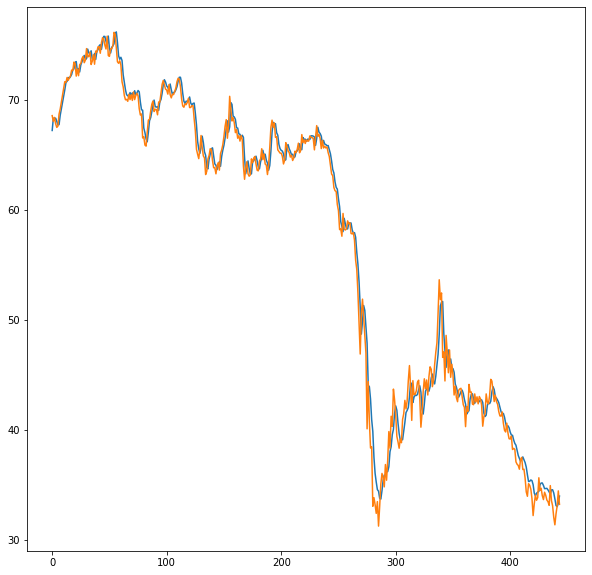

In [61]:
plt.figure(figsize=(10,10))
plt.plot(predicted_stock_price)
plt.plot(actual_stock_price)

In [62]:
pred_df=pd.DataFrame(predicted_stock_price)
act_df= pd.DataFrame(actual_stock_price)

In [63]:
predicted_stock_price= predicted_stock_price[-433:]
df=df[-433:]
df['Open2']= predicted_stock_price


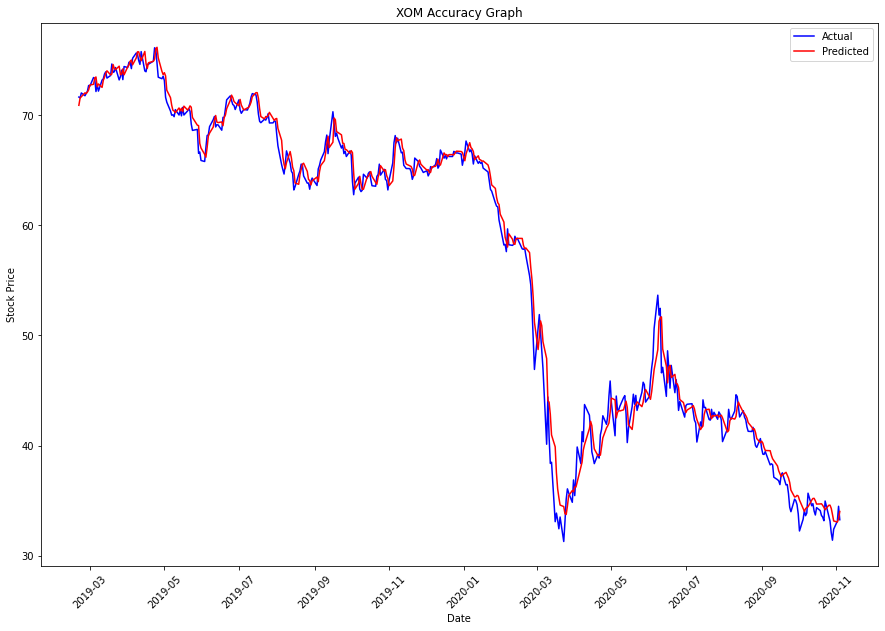

In [64]:
plt.figure(figsize=(15,10))
plt.plot(df['Open'], color='blue')
plt.plot(df['Open2'], color='red')
plt.title(S+" Accuracy Graph", fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Stock Price', fontsize=20)
plt.xticks(rotation=45)
plt.legend(['Actual','Predicted'], fontsize=20)
plt.rc('ytick', labelsize=17)
plt.rc('xtick', labelsize=14)
plt.savefig("modeldata//"+S+'accuracy_graph.png')

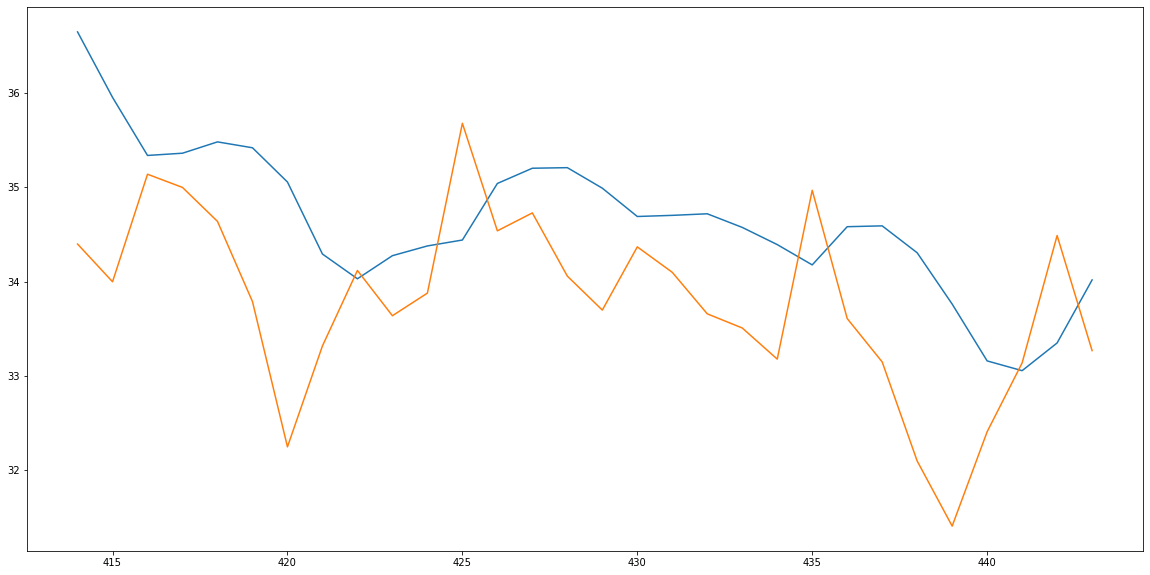

In [65]:
plt.figure(figsize=(20,10))
length= len(pred_df)
plt.plot(pred_df[length-30:])
plt.plot(act_df[length-30:])

In [67]:
import pickle
Pkl_Filename = "modeldata//"+S+".pkl"  
sc_file= "modeldata//"+S+"_sc.pkl"

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(regressor, file)
    
with open(sc_file, 'wb') as file:  
    pickle.dump(sc, file)